In [57]:
import os
from pathlib import Path 
import pandas as pd, numpy as np, datetime 
import matplotlib.pyplot as plt, seaborn as sns 
import plotly.graph_objects as go
from utils.fipi_lipi_processor import FIPIDataProcessor
from config.config import (FIPI_DIR, LIPI_DIR, PROCESSED_FIPI_LIPI_DIR, STOCKS_DIR, RAW_STOCKS_DIR)
from utils.fipi_lipi_preprocessor_v2 import FIPIDataProcessor
from utils.db_connection_v2 import DatabaseConnection
from config.db_config import db_config
from datetime import date, datetime



import pymysql


sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (18, 6)
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 300
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [20]:
dir_dict = {FIPI_DIR: 'fipi', LIPI_DIR: 'lipi'}

def merge_data(directories):
    merged_data = pd.DataFrame()

    # Iterate through each directory and type in dir_dict
    for dir_, types_ in directories.items():
        processor = FIPIDataProcessor(dir_, types_)
        data = processor.process_files()  # Make sure this returns a DataFrame
        
        # Only concatenate if `data` is not empty
        if not data.empty:
            merged_data = pd.concat([merged_data, data], ignore_index=True)
    
    return merged_data

merged_df = merge_data(dir_dict)

Scanning directory: 2019 : D:\fund_tracker_psx\data\fipi\2019
Scanning directory: 2020 : D:\fund_tracker_psx\data\fipi\2020
Scanning directory: 2021 : D:\fund_tracker_psx\data\fipi\2021
Scanning directory: 2022 : D:\fund_tracker_psx\data\fipi\2022
Scanning directory: 2023 : D:\fund_tracker_psx\data\fipi\2023
Scanning directory: 2024 : D:\fund_tracker_psx\data\fipi\2024
Scanning directory: 2019 : D:\fund_tracker_psx\data\lipi\2019
Scanning directory: 2020 : D:\fund_tracker_psx\data\lipi\2020
Scanning directory: 2021 : D:\fund_tracker_psx\data\lipi\2021
Scanning directory: 2022 : D:\fund_tracker_psx\data\lipi\2022
Scanning directory: 2023 : D:\fund_tracker_psx\data\lipi\2023
Scanning directory: 2024 : D:\fund_tracker_psx\data\lipi\2024


<BarContainer object of 5977 artists>

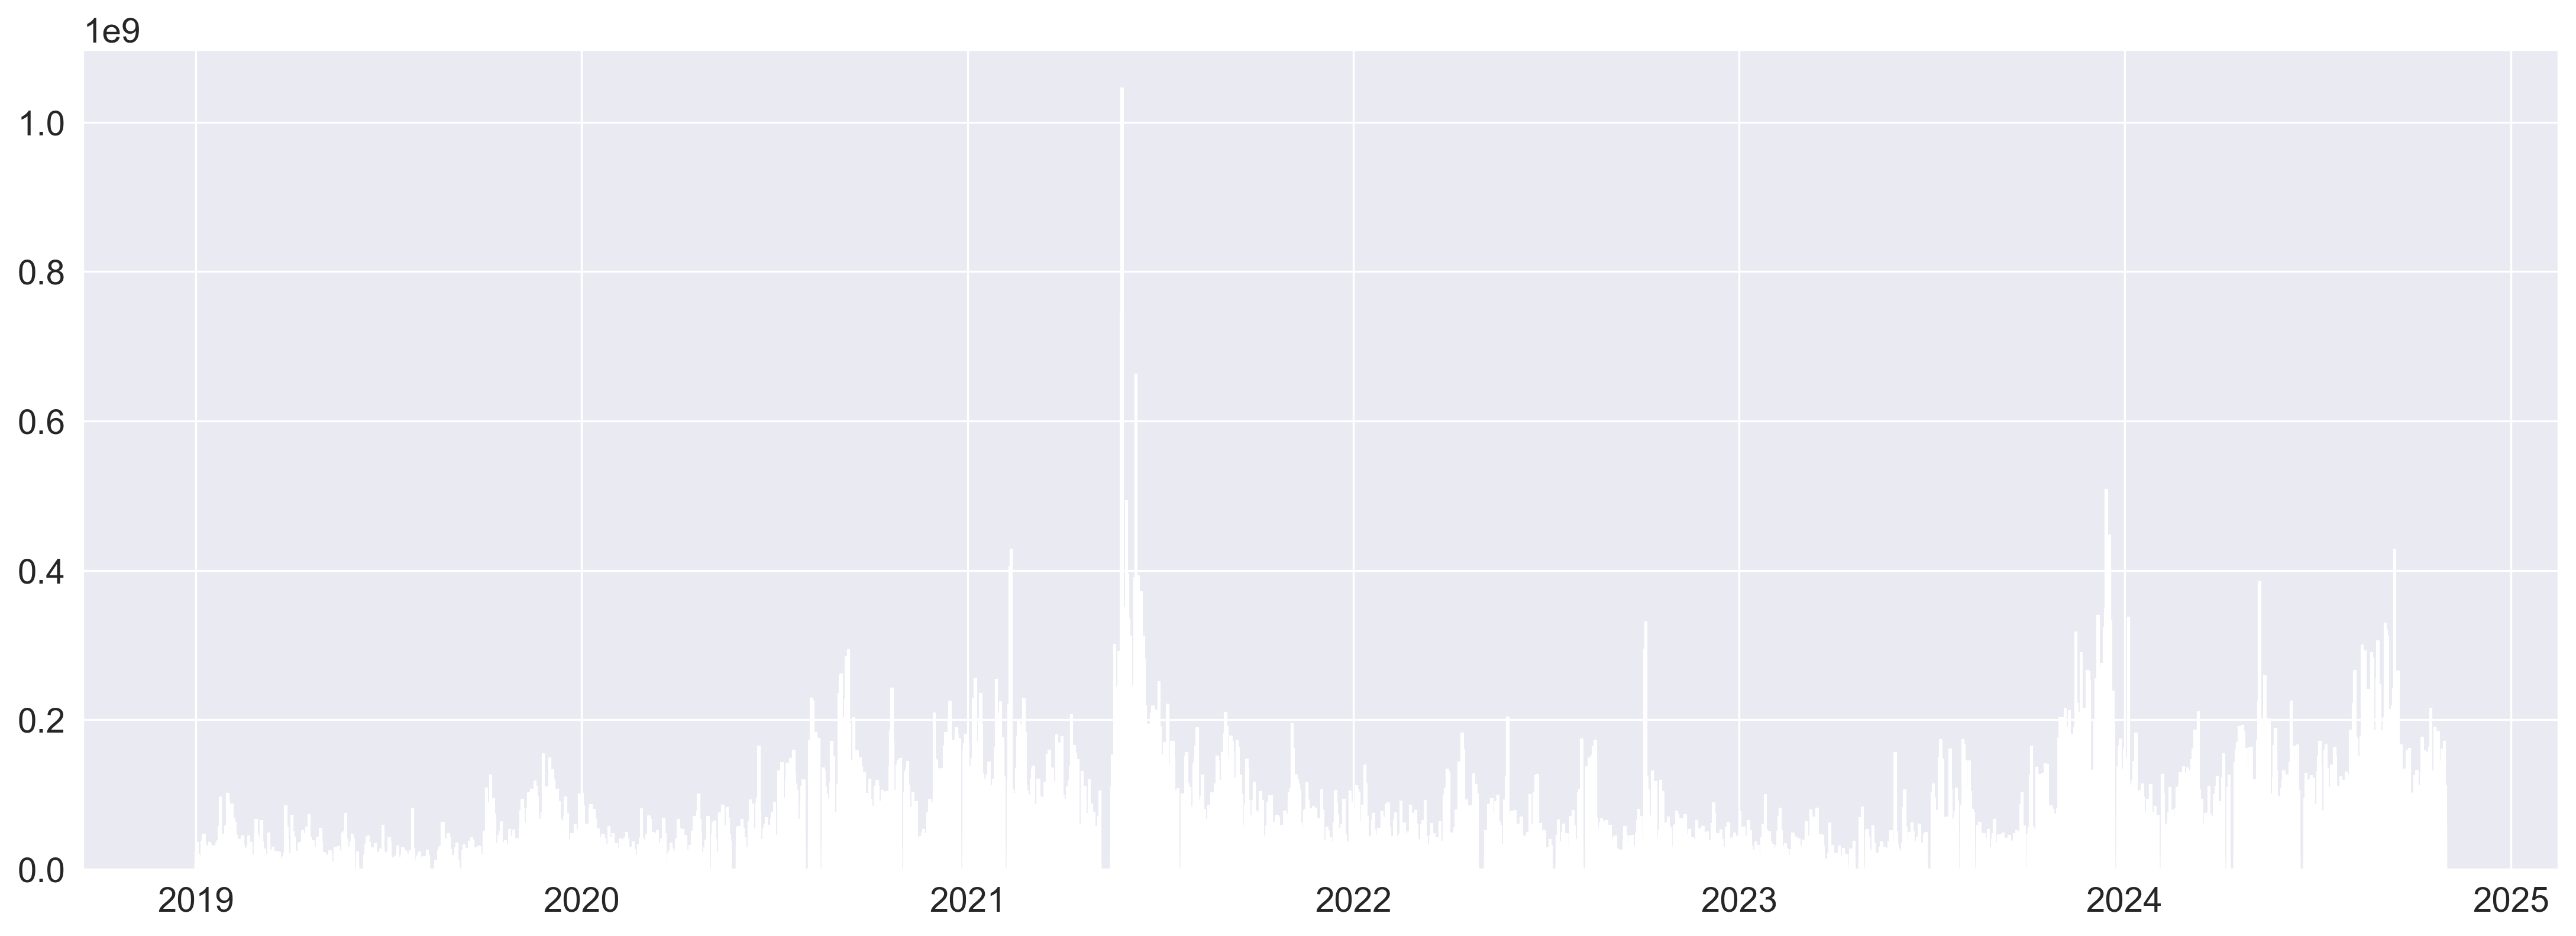

In [24]:
individual_buy = merged_df[merged_df['CLIENT TYPE'] == 'INDIVIDUALS']
foreign_individual_buy = merged_df[merged_df['CLIENT TYPE'] == 'FOREIGN INDIVIDUAL']

plt.bar(individual_buy['Date'], individual_buy['BUY VOLUME'])
plt.bar(foreign_individual_buy['Date'], foreign_individual_buy['BUY VOLUME'])

<BarContainer object of 5977 artists>

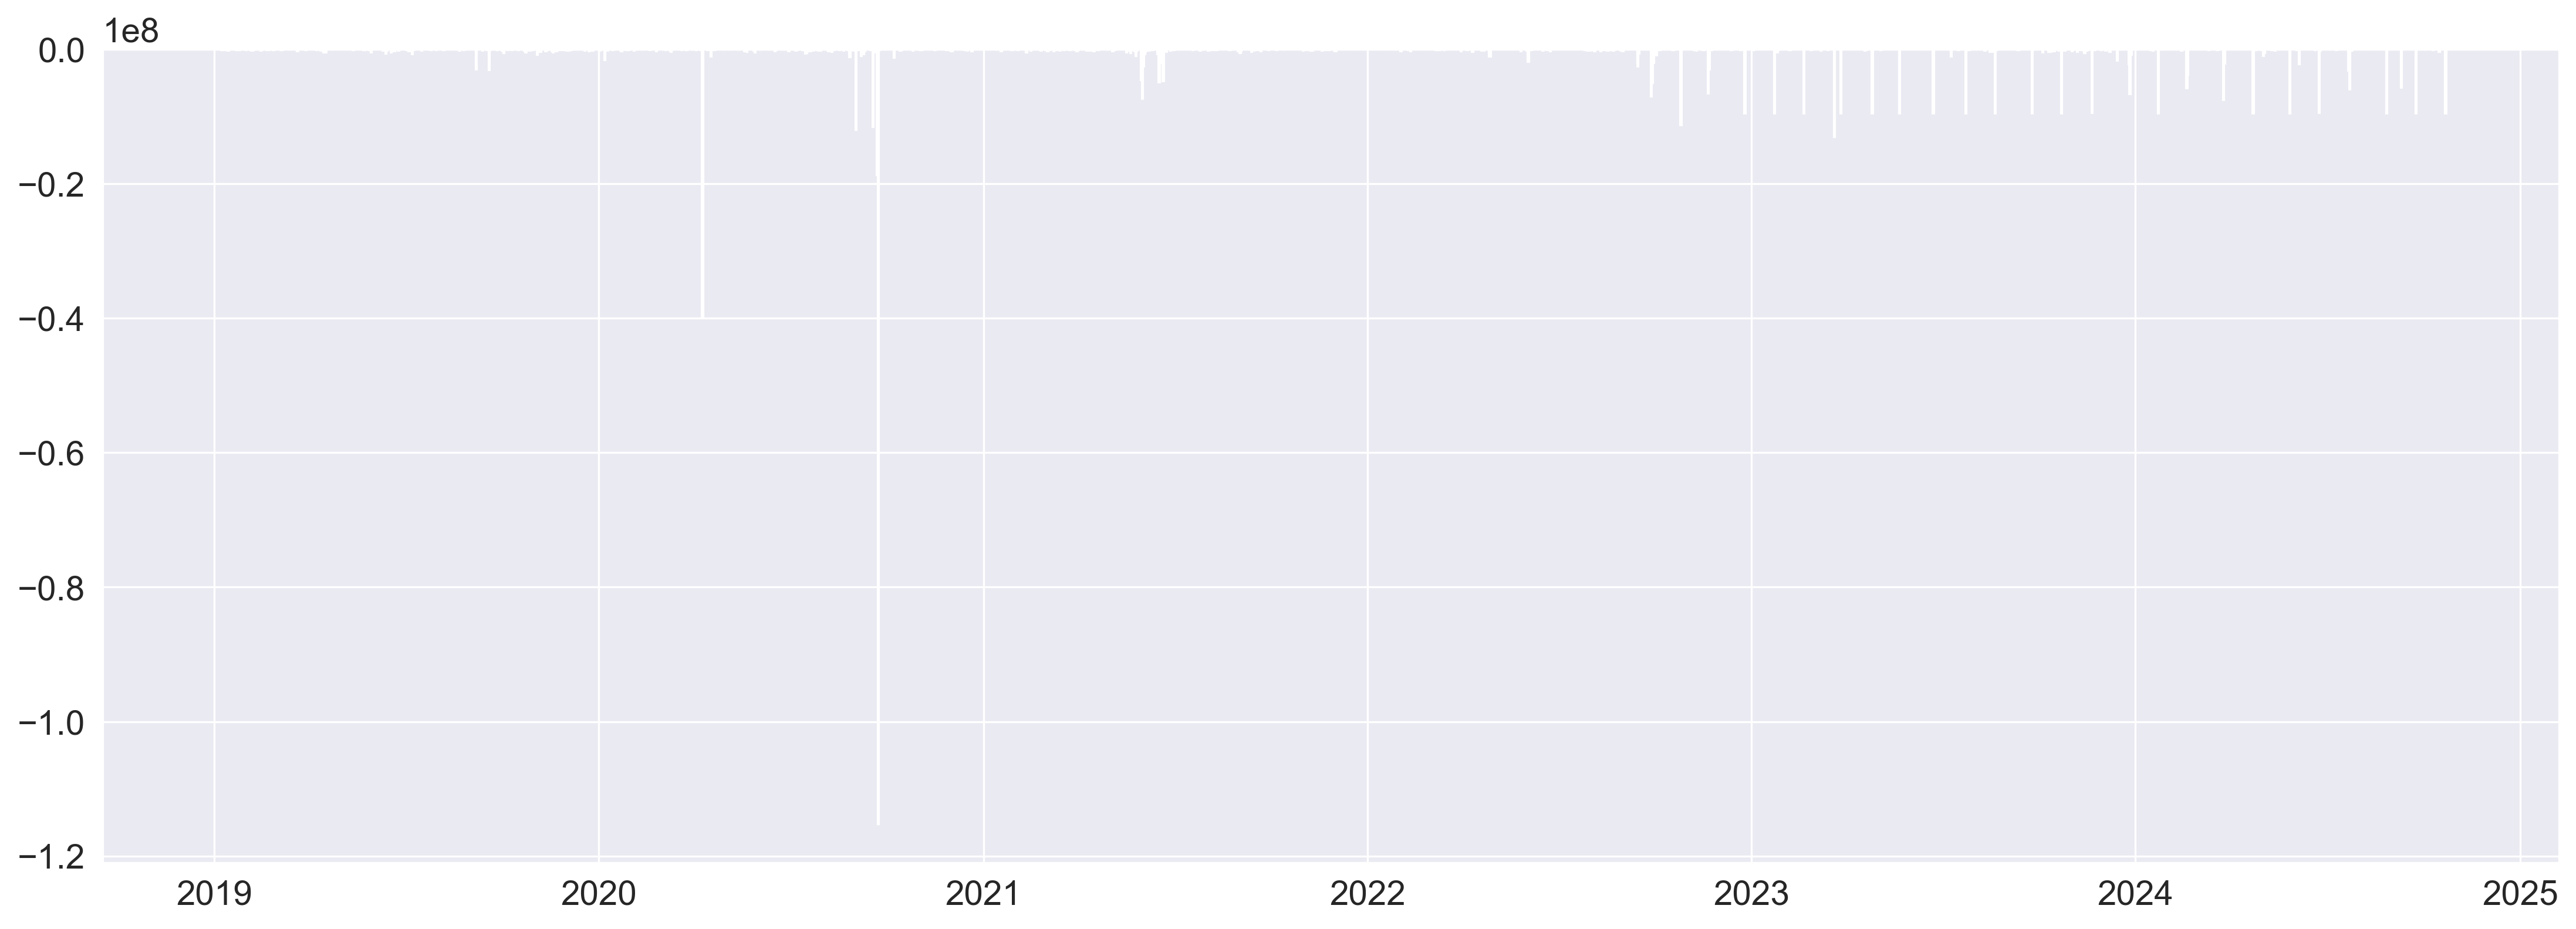

In [27]:
plt.bar(foreign_individual_buy['Date'], foreign_individual_buy['SELL VOLUME'])

<BarContainer object of 267743 artists>

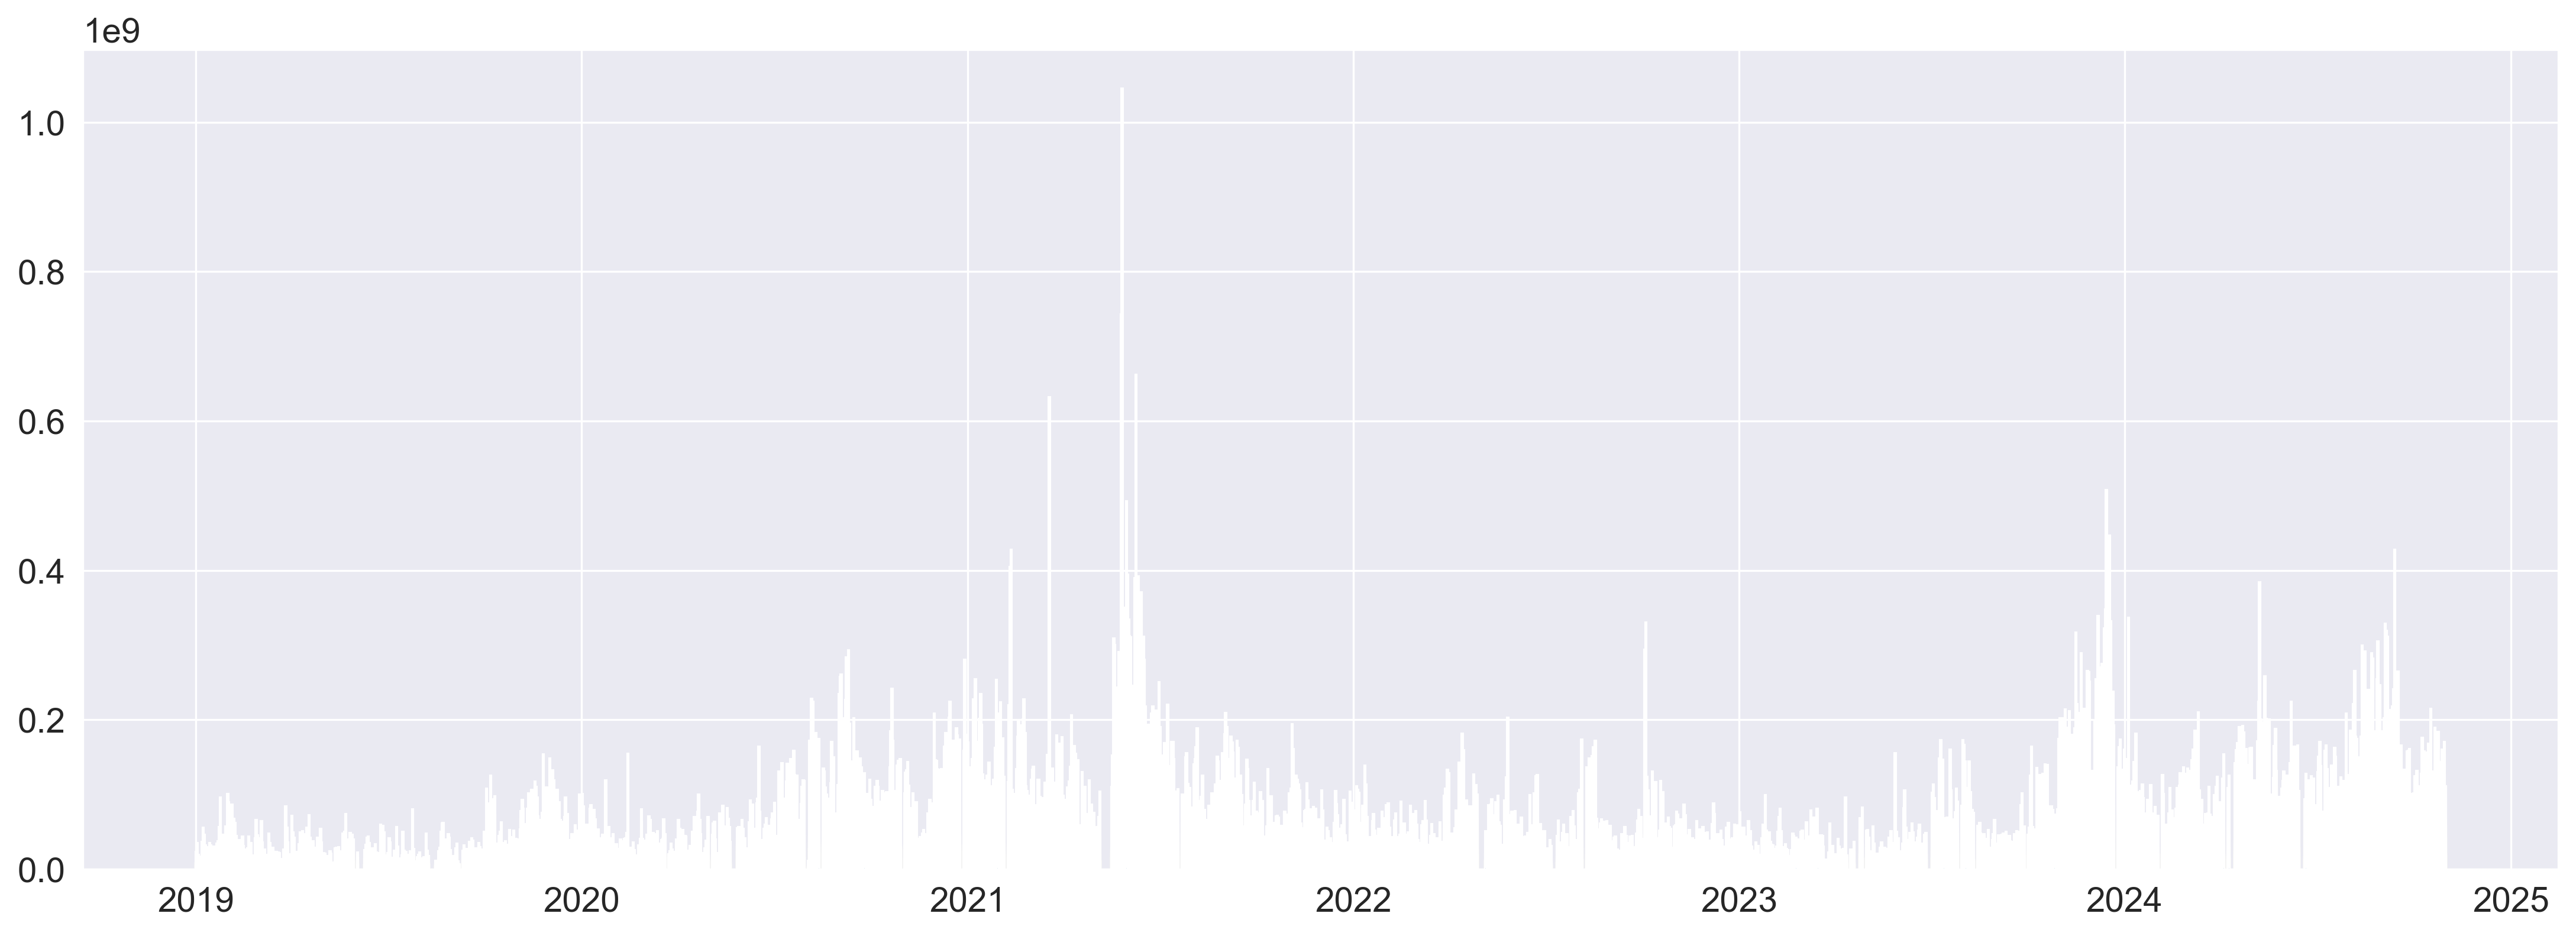

In [ ]:
plt.bar(merged_df['Date'], merged_df['BUY VOLUME'])

In [4]:
import plotly.graph_objs as go
import plotly.io as pio

# Assuming `merged_data` is your DataFrame
# Filter data for FOREIGN INDIVIDUAL and INDIVIDUALS (local)
foreign_individual_data = merged_data[merged_data['CLIENT TYPE'] == 'FOREIGN INDIVIDUAL']
local_individual_data = merged_data[merged_data['CLIENT TYPE'] == 'INDIVIDUALS']

# Create traces for each client type
trace_foreign = go.Scatter(
    x=foreign_individual_data['Date'],
    y=foreign_individual_data['NET VOLUME'],
    mode='lines',
    name='Foreign Individual',
    line=dict(color='blue')
)

trace_local = go.Scatter(
    x=local_individual_data['Date'],
    y=local_individual_data['NET VOLUME'],
    mode='lines',
    name='Local Individual',
    line=dict(color='orange')
)

# Combine the traces
data = [trace_foreign, trace_local]

# Define the layout
layout = go.Layout(
    title="NET VOLUME Comparison: Foreign Individual vs Local Individual",
    xaxis=dict(title='Date'),
    yaxis=dict(title='NET VOLUME'),
    hovermode='x unified'  # Shows all data points on the same x-value when hovering
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()


In [30]:
import plotly.express as px

px.bar(foreign_individual_buy, x='Date', y='NET VOLUME', color='NET VALUE', title='NET VOLUME Comparison: Foreign Individual vs Local Individual')

In [108]:
raw_stocks = os.listdir(RAW_STOCKS_DIR)
# raw_stocks = [stock.split('_')[0] for stock in raw_stocks if stock.endswith('.csv')]
raw_stocks

['786_01012014_01112024.csv',
 'AABS_01012014_01112024.csv',
 'AASM_01012014_01112024.csv',
 'AATM_01012014_01112024.csv',
 'ABL_01012014_01112024.csv',
 'ABOT_01012014_01112024.csv',
 'ACIETF_01012014_01112024.csv',
 'ADMM_01012014_01112024.csv',
 'ADOS_01012014_01112024.csv',
 'AEL_01012014_01112024.csv',
 'AGHA_01012014_01112024.csv',
 'AGIC_01012014_01112024.csv',
 'AGIL_01012014_01112024.csv',
 'AGLNCPS_01012014_01112024.csv',
 'AGLNCPS_01012015_01112024.csv',
 'AGL_01012014_01112024.csv',
 'AGP_01012014_01112024.csv',
 'AGSML_01012014_01112024.csv',
 'AGTL_01012014_01112024.csv',
 'AHCL_01012014_01112024.csv',
 'AHL_01012014_01112024.csv',
 'AHTM_01012015_01112024.csv',
 'AIRLINK_01012014_01112024.csv',
 'AKBL_01012014_01112024.csv',
 'AKDCL_01012014_01112024.csv',
 'AKDHL_01012014_01112024.csv',
 'AKDSL_01012014_01112024.csv',
 'AKGL_01012014_01112024.csv',
 'AKZO_01012014_01112024.csv',
 'ALAC_01012014_01112024.csv',
 'ALNRS_01012014_01112024.csv',
 'ALQT_01012014_01112024.csv'

In [132]:
new_stocks = pd.read_csv(Path(RAW_STOCKS_DIR) / raw_stocks[5])

In [133]:
new_stocks.tail()

,Symbol,Date,Open,High,Low,Close,Volume
2578,ABOT,28-Oct-2024,956.9,989.85,883.00,897.58,167856
2579,ABOT,29-Oct-2024,912.0,968.00,900.05,955.66,61465
2580,ABOT,30-Oct-2024,970.0,999.00,936.00,942.33,72220
2581,ABOT,31-Oct-2024,951.0,969.99,911.10,924.66,14612
2582,ABOT,01-Nov-2024,930.0,935.00,900.01,912.13,12109


In [134]:
len(new_stocks)/252

10.25

7.087301587301587

In [89]:
stock_name_code = Path(PROCESSED_FIPI_LIPI_DIR) / 'stocks_name_code_lotsize_industry_code.csv'

df = pd.read_csv(stock_name_code)

In [93]:
common_stock = df[df['Symbol'].isin(raw_stocks)]
not_common_stock = df[~df['Symbol'].isin(raw_stocks)]

In [107]:
not_common_stock[not_common_stock['Active'] == 1]

,Symbol,Company Name,Industry Code,Industry Name,Lot Size,Active
2,AAL,Agro Allianz Limited,830,TEXTILE SPINNING,1,1
9,ACPL,Attock Cement Pakistan Limited,804,CEMENT,1,1
10,ADAMS,Adam Sugar Mills Limited,826,SUGAR & ALLIED INDUSTRIES,500,1
23,AICL,Adamjee Insurance Company Limited,812,INSURANCE,500,1
30,ALIFE,Adamjee Life Assurance Company Limited,812,INSURANCE,500,1
38,ANLPS,Azgard Nine 8.95%(Pref),829,TEXTILE COMPOSITE,500,1
53,ASLPS,Aisha Steel Convertible (Pref),808,ENGINEERING,500,1
225,HAJT,Hajra Textile Mills Limited,830,TEXTILE SPINNING,500,1
230,HBLTETF,HBL Total Treasury (ETF),837,EXCHANGE TRADED FUNDS,100,1
287,KAKL,Kaiser Arts & Krafts Limited,829,TEXTILE COMPOSITE,500,1


In [124]:
import yfinance as yf

tickers = ['AAPL', 'GOOG', 'MSFT', 'TSLA', 'AMZN', 'META']
data = yf.download(tickers, period='1y', interval='1d')['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [125]:
data.reset_index(inplace=True)

In [126]:
import pandas as pd
data['Date'] = pd.to_datetime(data['Date']).dt.date

In [127]:
data.set_index('Date', inplace=True)

In [108]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import EfficientFrontier
from pypfopt.cla import CLA
import matplotlib.pyplot as plt
import seaborn as sns

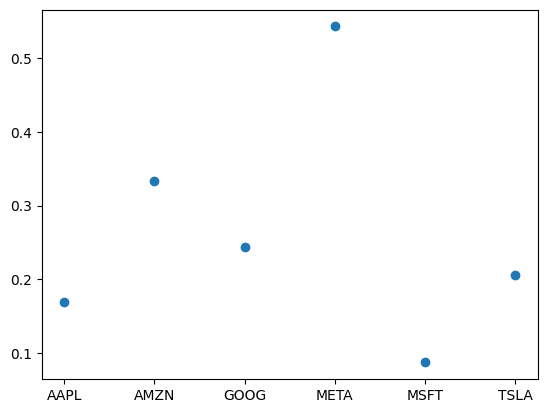

In [128]:
prices = mean_historical_return(data, frequency=252, log_returns=True)

plt.plot(prices, linestyle='None', marker='o')

In [129]:
cs = CovarianceShrinkage(data)

In [130]:
print(cs)

<Axes: xlabel='Ticker', ylabel='Ticker'>

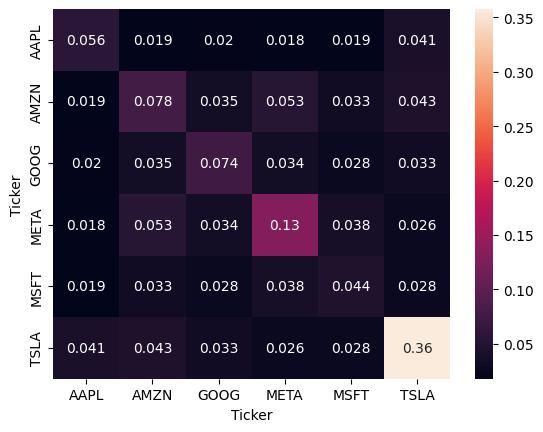

In [131]:
sns.heatmap(cs.ledoit_wolf(), annot=True)

In [103]:
pd.to_datetime('2023-11-16').date()

datetime.date(2023, 11, 16)

In [104]:
from datetime import datetime


epoch = {
    "before": {
        "start": pd.to_datetime("2023-11-16").date(),
        "end": pd.to_datetime("2024-01-05").date(),
    },
    "after": {
        "start": pd.to_datetime("2024-01-08").date(),
        "end": pd.to_datetime("2024-03-31").date(),
    },
    "current": {
        "start": pd.to_datetime("2024-04-17").date(),
        "end": pd.to_datetime("2024-07-31").date(),
    },
}


In [ ]:
e_cov = {}

# Iterate over each epoch
for x in epoch.keys():
    try:
        # Subset data based on epoch date ranges
        sub_prices = data.loc[epoch[x]['start']:epoch[x]['end']]
        # Calculate Ledoit-Wolf covariance
        sub_cs = CovarianceShrinkage(sub_prices).ledoit_wolf()
        e_cov[x] = sub_cs
    except KeyError as e:
        print(f"KeyError for epoch {x}: {e}")

In [106]:
e_cov

{'before': Ticker      AAPL      AMZN      GOOG      META      MSFT      TSLA
 Ticker                                                            
 AAPL    0.030852  0.011953  0.008419  0.011491  0.008567  0.010034
 AMZN    0.011953  0.039639  0.016425  0.017793  0.012203  0.003491
 GOOG    0.008419  0.016425  0.050672  0.020664  0.011798  0.007669
 META    0.011491  0.017793  0.020664  0.049378  0.014699  0.012922
 MSFT    0.008567  0.012203  0.011798  0.014699  0.029858 -0.000388
 TSLA    0.010034  0.003491  0.007669  0.012922 -0.000388  0.092260,
 'after': Ticker      AAPL      AMZN      GOOG      META      MSFT      TSLA
 Ticker                                                            
 AAPL    0.081147  0.006436  0.012487  0.004486  0.006350  0.009134
 AMZN    0.006436  0.094646  0.013377  0.047692  0.017046  0.006812
 GOOG    0.012487  0.013377  0.099290  0.012978  0.013235  0.002516
 META    0.004486  0.047692  0.012978  0.181338  0.023338  0.016593
 MSFT    0.006350  0.017046 

OrderedDict([('AAPL', 0.35539765250126937), ('AMZN', 0.08686958558652129), ('GOOG', 0.14312178281917984), ('META', 0.00719126175187936), ('MSFT', 0.40741971734115), ('TSLA', 0.0)])


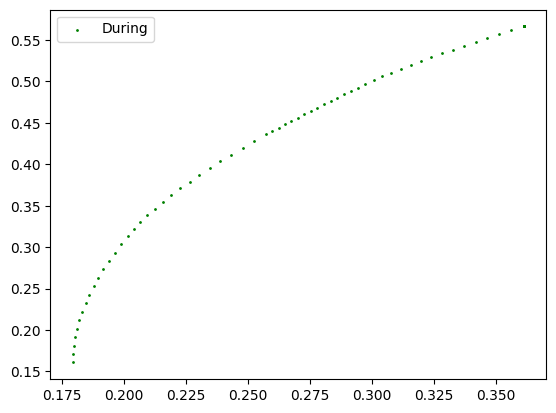

In [113]:
# Initialize the Crtical Line Algorithm object
efficient_portfolio_during = CLA(prices, cs.ledoit_wolf())

# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'g', marker = '.', label = 'During')
plt.legend()
plt.show()

<Axes: xlabel='AAPL', ylabel='Count'>

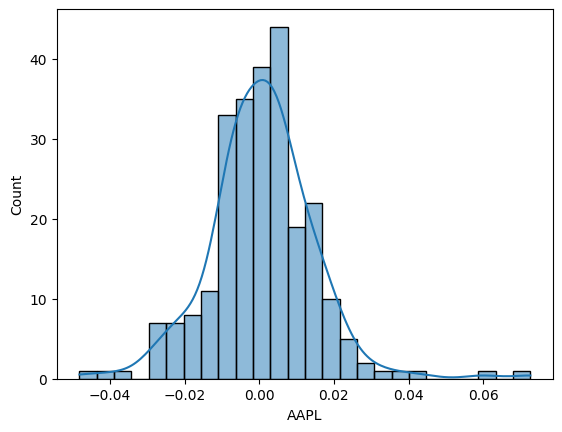

In [ ]:
sns.histplot(data['META'].pct_change().dropna(), kde=True)

<Axes: xlabel='Date'>

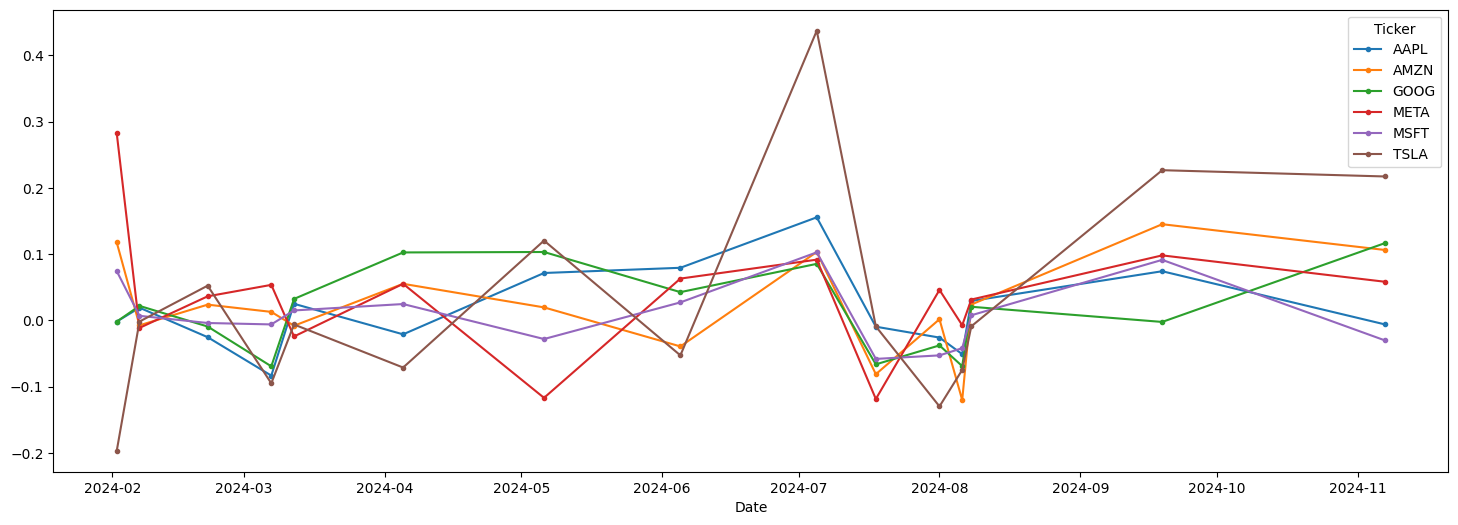

In [167]:
data[data['META'].pct_change()  >0.03].pct_change().plot(marker='.', linestyle='-', figsize=(18, 6))

In [168]:
import numpy as np
from scipy.stats import norm

In [169]:
returns = data.pct_change().dropna()

In [173]:
sns.histplot(returns['AAPL'], kde=True, norm.fit(returns['AAPL']))

SyntaxError: positional argument follows keyword argument (473145323.py, line 1)

C:\Users\razaa\AppData\Local\Temp\ipykernel_24184\3485120825.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns['AAPL'], fit=norm)


<Axes: xlabel='AAPL', ylabel='Density'>

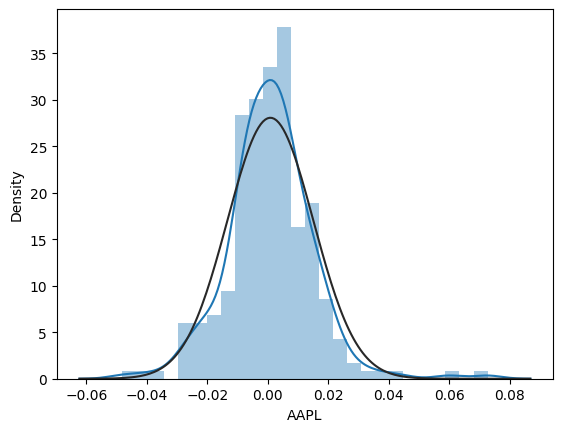

In [178]:
sns.distplot(returns['AAPL'], fit=norm)

<Axes: xlabel='META', ylabel='Density'>

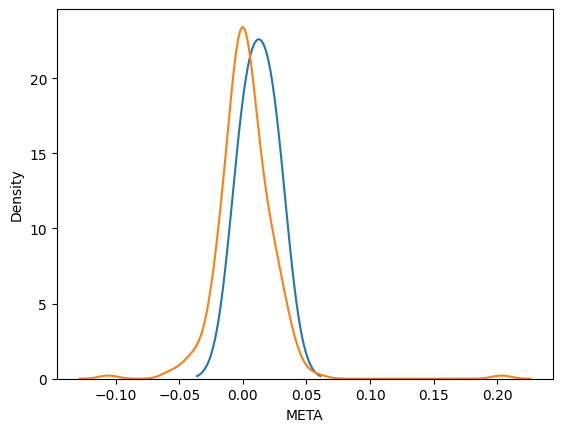

In [186]:
sns.kdeplot(norm.fit(returns['META']))
sns.kdeplot(returns['META'])

In [187]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(returns['META'])
print(f"Skewness of AAPL Returns: {skewness:.4f}")

# Interpretation
if skewness < 0:
    print("The distribution is left-skewed.")
elif skewness > 0:
    print("The distribution is right-skewed.")
else:
    print("The distribution is symmetric.")


Skewness of AAPL Returns: 2.2241
The distribution is right-skewed.


In [5]:
import pandas as pd 
df = pd.read_excel('pro_data.xlsx')

In [ ]:
df['return'] = df['NVDA']

,Date,ADA,AAPL,TSLA,GOOG,NVDA
0,2010-12-31,2.591,11.520,1.7753,14.864,0.3850
1,2011-12-30,2.918,14.464,1.9040,16.163,0.3465
2,2012-12-31,2.618,19.006,2.2580,17.702,0.3065
3,2013-12-31,3.182,20.036,10.0286,28.045,0.4005
4,2014-12-31,3.000,27.595,14.8273,26.533,0.5013
5,2015-12-31,3.000,26.315,16.0007,38.901,0.8240
6,2016-12-30,3.000,28.955,14.2460,39.623,2.6685
7,2017-12-29,3.050,42.307,20.7567,52.670,4.8375
8,2018-12-31,3.430,39.435,22.1867,52.248,3.3375
9,2019-12-31,3.000,73.412,27.8887,66.969,5.8825


In [9]:
std = df['NVDA'].std()
std

36.974119720959

In [60]:
db = DatabaseConnection(**db_config)
cursor = db.connect()
# cursor = db.get_cursor()

cursor.execute("SELECT DATABASE();")
db_name = cursor.fetchone()
print(f"Connected to database: {db_name[0]}")
cursor.execute('show tables;')
table_name = cursor.fetchall()

# for table in table_name:
#     print(table[0])

Connected to the database successfully!
Connected to database: u496382050_stock


In [35]:
t_name = table_name[5] 
query = f"SELECT * FROM {t_name[0]};"  
cursor.execute(query)
rows = cursor.fetchall()

# Print the data
# for row in rows:
#     print(row)

In [61]:
sector_type = f""" SELECT fipi_lipi_sector_id, fipi_lipi_sector_code FROM fipi_lipi_sector """
cursor.execute(sector_type)
sector_type_data = cursor.fetchall()

sector_type_mapping = {market_id[1]: market_id[0] for market_id in sector_type_data}

In [62]:
market_type = f""" SELECT fipi_lipi_market_type_id, market_type_name FROM fipi_lipi_market_types """
cursor.execute(market_type)
market_type_data = cursor.fetchall()

market_type_mapping = {market_id[1]: market_id[0] for market_id in market_type_data}

In [63]:
client_type = f""" SELECT fipi_lipi_client_type_id, client_type_name FROM fipi_lipi_client_types """
cursor.execute(client_type)
client_type_data = cursor.fetchall()

client_type_mapping = {market_id[1]: market_id[0] for market_id in client_type_data}

In [64]:
print(client_type_mapping, '\n', market_type_mapping, '\n', sector_type_mapping)

{'BANKS / DFI': 1, 'BROKER PROPRIETARY TRADING': 2, 'COMPANIES': 3, 'INDIVIDUALS': 4, 'INSURANCE COMPANIES': 5, 'MUTUAL FUNDS': 6, 'NBFC': 7, 'OTHER ORGANIZATION': 8, 'FOREIGN CORPORATES ': 9, 'FOREIGN INDIVIDUAL': 10, 'OVERSEAS PAKISTANI': 11} 
 {'OFF-MARKET': 1, 'REGULAR': 2, 'FUTURE CONTRACT': 3} 
 {'S0036': 1, 'S0005': 2, 'S0028': 3, 'S1111': 4, 'S0008': 5, 'S0007': 6, 'S0019': 7, 'S0020': 8, 'S0023': 9, 'S0026': 10, 'S0029': 11}


In [ ]:
client_type = f""" SELECT fipi_lipi_client_type_id, client_type_name FROM fipi_lipi_client_types """
cursor.execute(client_type)
client_type_data = cursor.fetchall()

client_type_mapping = {market_id[1]: market_id[0] for market_id in client_type_data}

In [104]:
fipi_test = cleaned_data.copy()

In [105]:
fipi_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54653 entries, 0 to 54652
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   54653 non-null  datetime64[us]
 1   CLIENT TYPE            54651 non-null  object        
 2   SEC CODE               54653 non-null  object        
 3   SECTOR NAME            54653 non-null  object        
 4   MARKET TYPE            54653 non-null  object        
 5   BUY VOLUME             54653 non-null  float64       
 6   BUY VALUE              54653 non-null  float64       
 7   SELL VOLUME            54653 non-null  float64       
 8   SELL VALUE             54653 non-null  float64       
 9   NET VOLUME             54653 non-null  float64       
 10  NET VALUE              54653 non-null  float64       
 11  USD                    54653 non-null  float64       
 12  market_type_name       54653 non-null  object        
 13  F

In [106]:
fipi_test

,Date,CLIENT TYPE,SEC CODE,SECTOR NAME,MARKET TYPE,BUY VOLUME,BUY VALUE,SELL VOLUME,SELL VALUE,NET VOLUME,NET VALUE,USD,market_type_name,FUTURE_CONTRACT_MONTH,Year,Month
0,2019-01-01,FOREIGN CORPORATES,S0026,Commercial Banks,REGULAR,0.0,0.0,-150000.0,-29400000.0,-150000.0,-29400000.0,-211510.0,REGULAR,0,2019,1
1,2019-01-01,FOREIGN INDIVIDUAL,S0020,Oil and Gas Marketing Companies,FUTURE CONTRACT-JAN,500.0,11805.0,0.0,0.0,500.0,11805.0,84.0,FUTURE CONTRACT,1,2019,1
2,2019-01-01,FOREIGN INDIVIDUAL,S1111,All other Sectors,FUTURE CONTRACT-JAN,2500.0,168125.0,-2500.0,-173850.0,0.0,-5725.0,-41.0,FUTURE CONTRACT,1,2019,1
3,2019-01-01,OVERSEAS PAKISTANI,S0005,Cement,FUTURE CONTRACT-JAN,92000.0,7086350.0,-122000.0,-16531305.0,-30000.0,-9444955.0,-67949.0,FUTURE CONTRACT,1,2019,1
4,2019-01-01,OVERSEAS PAKISTANI,S0007,Fertilizer,FUTURE CONTRACT-JAN,10500.0,694915.0,-12500.0,-3331580.0,-2000.0,-2636665.0,-18968.0,FUTURE CONTRACT,1,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54648,2024-07-31,OVERSEAS PAKISTANI,S0023,Power Generation and Distribution,REGULAR,689346.0,19108913.0,-1523432.0,-37184261.0,-834086.0,-18075347.0,-64786.0,REGULAR,0,2024,7
54649,2024-07-31,OVERSEAS PAKISTANI,S0026,Commercial Banks,REGULAR,1069902.0,87605846.0,-924391.0,-64052174.0,145511.0,23553671.0,84421.0,REGULAR,0,2024,7
54650,2024-07-31,OVERSEAS PAKISTANI,S0028,Technology and Communication,REGULAR,12583409.0,107656083.0,-16711580.0,-77224982.0,-4128171.0,30431101.0,109072.0,REGULAR,0,2024,7
54651,2024-07-31,OVERSEAS PAKISTANI,S0029,Textile Composite,REGULAR,120221.0,5736239.0,-139587.0,-6539847.0,-19366.0,-803607.0,-2880.0,REGULAR,0,2024,7


In [ ]:
# create the new datset only for MARKET TYPE
fipi_test_market_type = fipi_test['MARKET TYPE']
fipi_test_market_type

#generat the unique values
fipi_test_market_type_unique = fipi_test_market_type.unq


#query

#compare the result if both counts are same its ok other wise insert



In [ ]:
from datetime import date

# Function to get or insert the fipi_lipi_client_id
def get_or_insert_fipi_lipi_client(client_type, market_type_name, sector_type):
    try:
        cursor = db.connect()

        # Check if the combination already exists
        query = f"""
            SELECT fipi_lipi_client_id FROM fipi_lipi_clients
            WHERE fipi_lipi_client_type_id = %s AND fipi_lipi_market_type_id = %s AND fipi_lipi_sector_id = %s
        """
        cursor.execute(query, (client_type, market_type_name, sector_type))
        result = cursor.fetchone()

        if result:
            return result[0]  # Return the existing ID
        else:
            # Insert the new combination
            insert_query = f"""
                INSERT INTO fipi_lipi_clients (
                    fipi_lipi_client_type_id,
                    fipi_lipi_market_type_id,
                    fipi_lipi_sector_id,
                    fipi_lipi_client_added_date,
                    fipi_lipi_client_added_by,
                    fipi_lipi_client_modified_date,
                    fipi_lipi_client_modified_by
                )
                VALUES (%s, %s, %s, %s, %s, %s, %s)
            """
            cursor.execute(
                insert_query,
                (client_type, market_type_name, sector_type, date.today(), 1000, date.today(), 1000)
            )
            db.commit()
            return cursor.lastrowid 
    except Exception as e:
        print(f"Error in get_or_insert_fipi_lipi_client: {e}")
        raise


# Iterate over the DataFrame and process each row
try:
    for index, row in fipi_test.iterrows():
        # Map client_type, market_type, and sector_type from the DataFrame to their respective IDs
    
        client_type_id = client_type_mapping.get(row["CLIENT TYPE"])
        market_type_id = market_type_mapping.get(row["market_type_name"])
        sector_type_id = sector_type_mapping.get(row["SEC CODE"])

        print(client_type_id, market_type_id, sector_type_id)

        # Ensure the mappings exist
        if not client_type_id or not market_type_id or not sector_type_id:
            print(f"Mapping not found for row: {row}")
            continue

        # Get or insert the fipi_lipi_client_id
        fipi_lipi_client_id = get_or_insert_fipi_lipi_client(client_type_id, market_type_id, sector_type_id)
        print(f"Inserted or retrieved fipi_lipi_client_id: {fipi_lipi_client_id}")

        # Prepare the data for the fipi table
        fipi_data = (
            fipi_lipi_client_id,
            row["BUY VOLUME"],
            row["BUY VALUE"],
            row["SELL VOLUME"],
            row["SELL VALUE"],
            row["NET VOLUME"],
            row["NET VALUE"],
            row["USD"],
            row['FUTURE_CONTRACT_MONTH'],
            row["Month"],
            row["Year"],
            row["Date"],
            date.today(),
            1000,
            date.today(),
            1000
        )

        # Insert into the fipi table
        fipi_insert_query = f"""
            INSERT INTO fipi (
                fipi_lipi_client_id, fipi_buy_volume, fipi_buy_value, fipi_sell_volume,
                fipi_sell_value, fipi_net_volume, fipi_net_value, fipi_usd, fipi_contract_month,
                fipi_month, fipi_year, fipi_date, fipi_added_date, fipi_added_by,
                fipi_modified_date, fipi_modified_by
            ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """
        cursor.execute(fipi_insert_query, fipi_data)

    # Commit all changes after processing the DataFrame
    db.commit()
    print("All changes committed successfully!")

except Exception as e:
    print(f"Error during data processing: {e}")
    db.rollback()  # Rollback in case of error



9 2 10
Error executing query: (2006, "MySQL server has gone away (ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))")
Error in get_or_insert_fipi_lipi_client: (2006, "MySQL server has gone away (ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))")
Error during data processing: (2006, "MySQL server has gone away (ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))")
Error rolling back transaction: (0, '')


InterfaceError: (0, '')

In [116]:
query = """SELECT * FROM fipi_lipi_clients;"""  # Correct spelling of SELECT
cursor.execute(query)
print(cursor.fetchone())


(1, 9, 2, 10, '', datetime.date(2024, 12, 5), 1000, datetime.date(2024, 12, 5), 1000, None, None)


In [54]:
print(type(cursor))

<class 'utils.db_connection_v2.AutoReconnectCursor'>


---
---
---

In [107]:
# Correct way to call commit from the DatabaseConnection class
table_name = 'city'
data = [
    ('1', 'Karachi', 'KHI', '1', '2024-12-02', '1000'),
    ('2', 'Dubai', 'DXB', '1', '2024-12-02', '1000'),
    ('2', 'Abu Dhabi', 'AUH', '1', '2024-12-02', '1000'),
    ('3', 'Riyadh', 'RUH', '1', '2024-12-02', '1000'),
]

# SQL query to insert data into the table
query = f"""
INSERT INTO {table_name} (
    country_id, city_name, city_code, city_status, city_added_date, city_added_by
) VALUES (%s, %s, %s, %s, %s, %s);
"""

try:
    # Insert data row by row
    for row in data:
        cursor.execute(query, row)
    
    # Commit the transaction using DatabaseConnection's commit method
    db.commit()

    print(f"Data successfully inserted into the {table_name} table.")
except pymysql.MySQLError as e:
    print(f"Error inserting data: {e}")
    db.connection.rollback()  # Rollback in case of an error


Transaction committed successfully!
Data successfully inserted into the city table.


In [121]:
## Exchange Data insert 
table_name = 'exchange'
data = [
    # (1, 1, 'Karachi Stock Exchange', 'KSE', 1, '2024-12-02', '1000', '2024-12-02', '1000', None, None),
    (2, 2, 'Dubai Financial Market', 'DFM', 1, '2024-12-02', '1000'),
    (2, 3, 'Abu Dhabi Securities Exchange', 'ADX', 1, '2024-12-02', '1000'),
    (3, 4, 'The Saudi Stock Exchange', 'TADAWUL', 1, '2024-12-02', '1000')
]

# SQL query to insert data into the table
query = f"""
INSERT INTO {table_name} (
    country_id,
    city_id,
    exchange_name,
    exchange_code,
    exchange_status,
    exchange_added_date,
    exchange_added_by
) VALUES (%s, %s, %s, %s, %s, %s, %s);
"""

try:
    for row in data:
        cursor.execute(query, row)
    db.commit()

    print(f"Data successfully inserted into the {table_name} table.")
except pymysql.MySQLError as e:
    print(f"Error inserting data: {e}")
    db.connection.rollback() 

Transaction committed successfully!
Data successfully inserted into the exchange table.


In [ ]:
sector_data = pd.read_csv(Path(STOCKS_DIR)/'Industry_code&Name.csv')

query = f"""
INSERT INTO exchange_sector (
    exchange_id,
    exchange_sector_name,
    exchange_sector_code,
    exchange_sector_status,
    exchange_sector_added_date,
    exchange_sector_added_by

) VALUES (%s, %s, %s, %s, %s, %s);
"""

try:
    for index, row in sector_data.iterrows():
        values = (
            row['Exchange Id'],          # exchange_id
            row['Industry Name'],        # exchange_sector_name
            row['Industry Code'],        # exchange_sector_code
            row['Exchange Status'],      # exchange_sector_status
            '2024-12-02',                # exchange_sector_added_date
            1000                        # exchange_sector_added_by
        )
        cursor.execute(query, values)

    # Commit the transaction
    db.commit()
    print("Data successfully inserted into the exchange_sector table.")
except pymysql.MySQLError as e:
    print(f"Error inserting data: {e}")
    db.connection.rollback() 

Transaction committed successfully!
Data successfully inserted into the exchange_sector table.


In [161]:
stocks_data = pd.read_csv(Path(PROCESSED_FIPI_LIPI_DIR)/'stocks_name_code_lotsize_industry_code.csv')
stocks_data

,Symbol,Company Name,Industry Code,Industry Name,Lot Size,Active
0,786,786 Investments Limited,813,INV. BANKS / INV. COS. / SECURITIES COS.,500,1
1,AABS,Al-Abbas Sugar Mills Limited,826,SUGAR & ALLIED INDUSTRIES,1,1
2,AAL,Agro Allianz Limited,830,TEXTILE SPINNING,1,1
3,AASM,Al-Abid Silk Mills Limited,827,SYNTHETIC & RAYON,500,1
4,AATM,Ali Asghar Textile Mills Limited,830,TEXTILE SPINNING,500,1
...,...,...,...,...,...,...
538,ZAHID,Zahidjee Textile Mills Limited,829,TEXTILE COMPOSITE,500,1
539,ZELP,Zeal Pak Cement Factory Limited,804,CEMENT,500,0
540,ZHCM,Zahur Cotton Mills Limited,829,TEXTILE COMPOSITE,500,0
541,ZIL,ZIL Limited,810,FOOD & PERSONAL CARE PRODUCTS,1,1


In [166]:
stocks_data = pd.read_csv(Path(PROCESSED_FIPI_LIPI_DIR)/'stocks_name_code_lotsize_industry_code.csv')

insert_query = f"""
INSERT INTO exchange_sector_stock (
    stock_symbol,
    stock_name,
    stock_status,
    exchange_sector_id,
    stock_added_date,
    stock_added_by

) VALUES (%s, %s, %s, %s, %s, %s);
"""
# Query to get sector_code and sector_id from exchange_sector
sector_query = "SELECT exchange_sector_id, exchange_sector_code FROM exchange_sector;"
cursor.execute(sector_query)
sector_data = cursor.fetchall()
sector_mapping = {row[1]: row[0] for row in sector_data}

try:
    for index, row in stocks_data.iterrows():
        sector_id = sector_mapping.get(row['Industry Code'])
        
        if sector_id is None:
            print(f"Sector ID not found for sector code {row['sector_code']}")
            continue

        # Prepare data for insertion
        values = (
            row['Symbol'],                # stock_symbol
            row['Company Name'],          # stock_name
            row['Active'],                # stock_status
            sector_id,                    # exchange_sector_id (mapped from sector_code)
            '2024-12-02',            # stock_added_date
            1000,                         # stock_added_by
        )
        cursor.execute(insert_query, values)

    # Commit the transaction
    db.commit()
    print("Stock data successfully inserted into exchange_sector_stock table.")

except pymysql.MySQLError as e:
    print(f"Error inserting stock data: {e}")
    db.connection.rollback()

Transaction committed successfully!
Stock data successfully inserted into exchange_sector_stock table.


In [304]:
query = "SELECT stock_id, stock_symbol FROM exchange_sector_stock;"
cursor.execute(query)
stock_mapping = cursor.fetchall()

# Create a mapping from stock_symbol to stock_id
stock_id_map = {row[1]: row[0] for row in stock_mapping}
print("Stock ID Mapping:", stock_id_map)

Stock ID Mapping: {'786': 1, 'AABS': 2, 'AAL': 3, 'AASM': 4, 'AATM': 5, 'ABL': 6, 'ABOT': 7, 'ABSON': 8, 'ACIETF': 9, 'ACPL': 10, 'ADAMS': 11, 'ADMM': 12, 'AGHA': 13, 'AGIC': 14, 'AGIL': 15, 'AGL': 16, 'AGLNCPS': 17, 'AGP': 18, 'AGSML': 19, 'AGTL': 20, 'AHCL': 21, 'AHL': 22, 'AHTM': 23, 'AICL': 24, 'AIRLINK': 25, 'AKBL': 26, 'AKDHL': 27, 'AKDSL': 28, 'AKGL': 29, 'ALAC': 30, 'ALIFE': 31, 'ALNRS': 32, 'ALTN': 33, 'AMBL': 34, 'AMSL': 35, 'AMTEX': 36, 'ANL': 37, 'ANLNV': 38, 'ANLPS': 39, 'ANNT': 40, 'ANSM': 41, 'ANTM': 42, 'APL': 43, 'APOT': 44, 'ARCTM': 45, 'ARPAK': 46, 'ARPL': 47, 'ARUJ': 48, 'ASC': 49, 'ASHT': 50, 'ASIC': 51, 'ASL': 52, 'ASLCPS': 53, 'ASLPS': 54, 'ASTL': 55, 'ASTM': 56, 'ATBA': 57, 'ATIL': 58, 'ATLH': 59, 'ATRL': 60, 'AVN': 61, 'AWTX': 62, 'AZMT': 63, 'BAFL': 64, 'BAFS': 65, 'BAHL': 66, 'BAPL': 67, 'BATA': 68, 'BCL': 69, 'BECO': 70, 'BELA': 71, 'BERG': 72, 'BFMOD': 73, 'BGL': 74, 'BHAT': 75, 'BIFO': 76, 'BIIC': 77, 'BILF': 78, 'BIPL': 79, 'BML': 80, 'BNL': 81, 'BNWM': 8

In [313]:
# SQL query to insert data into stock_info table
insert_query = f"""
INSERT INTO exchange_sector_stock_info (
    stock_id,
    stock_face_value,
    stock_lot_size,
    stock_year_end,
    stock_no_of_shares,
    stock_no_of_shares_FF,
    stock_idx_weight_pct,
    stock_no_of_share_holders,
    stock_info_added_date,
    stock_info_added_by,
    stock_info_modified_date,
    stock_info_modified_by
) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
"""

# Prepare and execute the insert queries
try:
    for index, row in stock_info.iterrows():
        values = (
            row['stock_id'],
            row['FACE_VALUE'] if not pd.isna(row['FACE_VALUE']) else None,
            row['Lot Size'] if not pd.isna(row['Lot Size']) else None,
            row['Year End'] if not pd.isna(row['Year End']) else None,
            row['ORD SHARES'] if not pd.isna(row['ORD SHARES']) else None,
            row['FF BASED SHARES'] if not pd.isna(row['FF BASED SHARES']) else None,
            row['IDX WT %'] if not pd.isna(row['IDX WT %']) else None,
            row['NSHARE_HOLDER'] if not pd.isna(row['NSHARE_HOLDER']) else None,
            '2024-12-02',
            1000,
            '2024-12-02',
            1000
        )

        cursor.execute(insert_query, values)

    # Commit the transaction
    db.commit()
    print("Data successfully inserted into stock_info table.")

except pymysql.MySQLError as e:
    print(f"Error inserting data: {e}")
    db.connection.rollback()


Transaction committed successfully!
Data successfully inserted into stock_info table.


In [46]:
query = f"""

INSERT INTO fipi_lipi_client_types (

client_type_name, 
client_type_description,
client_type_status, 
fipi_lipi_client_type_added_date,
fipi_lipi_client_type_added_by, 
fipi_lipi_client_type_modified_date, 
fipi_lipi_client_type_modified_by
) VALUES ( %s, %s, %s, %s,%s, %s, %s);
"""
try:
    for i, value in fipi_lipi_data.iterrows():
        values = (
            value['client_type_name'],
            value['client_type_name'],
            1,
            '2024-12-03',
            1000,
            '2024-12-03',
            1000
        )
        cursor.execute(query, values)

    db.commit()
    print("Data successfully inserted into stock_info table.")

except pymysql.MySQLError as e:
    print(f"Error inserting data: {e}")
    db.connection.rollback()

Transaction committed successfully!
Data successfully inserted into stock_info table.


In [51]:
fipi = pd.read_csv(Path(FIPI_DIR)/'2024'/'01-01-2024fipi.csv')

In [51]:
fipi

NameError: name 'fipi' is not defined

In [86]:
directory = "data/fipi"  # Directory containing your FIPI CSV files
processor = FIPIDataProcessor(directory)

# Process and get the cleaned data
cleaned_data = processor.process_files()
print(cleaned_data.head())  # Display the first few rows of the cleaned data

Scanning directory: 2019 : data\fipi\2019
Scanning directory: 2020 : data\fipi\2020
Scanning directory: 2021 : data\fipi\2021
Scanning directory: 2022 : data\fipi\2022
Scanning directory: 2023 : data\fipi\2023
Scanning directory: 2024 : data\fipi\2024
        Date          CLIENT TYPE SEC CODE                      SECTOR NAME  \
0 2019-01-01  FOREIGN CORPORATES     S0026                 Commercial Banks   
1 2019-01-01   FOREIGN INDIVIDUAL    S0020  Oil and Gas Marketing Companies   
2 2019-01-01   FOREIGN INDIVIDUAL    S1111                All other Sectors   
3 2019-01-01   OVERSEAS PAKISTANI    S0005                           Cement   
4 2019-01-01   OVERSEAS PAKISTANI    S0007                       Fertilizer   

           MARKET TYPE  BUY VOLUME  BUY VALUE  SELL VOLUME  SELL VALUE  \
0              REGULAR         0.0        0.0    -150000.0 -29400000.0   
1  FUTURE CONTRACT-JAN       500.0    11805.0          0.0         0.0   
2  FUTURE CONTRACT-JAN      2500.0   168125.0      

In [87]:
cleaned_data

,Date,CLIENT TYPE,SEC CODE,SECTOR NAME,MARKET TYPE,BUY VOLUME,BUY VALUE,SELL VOLUME,SELL VALUE,NET VOLUME,NET VALUE,USD,market_type_name,FUTURE_CONTRACT_MONTH,Year,Month
0,2019-01-01,FOREIGN CORPORATES,S0026,Commercial Banks,REGULAR,0.0,0.0,-150000.0,-29400000.0,-150000.0,-29400000.0,-211510.0,REGULAR,0,2019,1
1,2019-01-01,FOREIGN INDIVIDUAL,S0020,Oil and Gas Marketing Companies,FUTURE CONTRACT-JAN,500.0,11805.0,0.0,0.0,500.0,11805.0,84.0,FUTURE CONTRACT,1,2019,1
2,2019-01-01,FOREIGN INDIVIDUAL,S1111,All other Sectors,FUTURE CONTRACT-JAN,2500.0,168125.0,-2500.0,-173850.0,0.0,-5725.0,-41.0,FUTURE CONTRACT,1,2019,1
3,2019-01-01,OVERSEAS PAKISTANI,S0005,Cement,FUTURE CONTRACT-JAN,92000.0,7086350.0,-122000.0,-16531305.0,-30000.0,-9444955.0,-67949.0,FUTURE CONTRACT,1,2019,1
4,2019-01-01,OVERSEAS PAKISTANI,S0007,Fertilizer,FUTURE CONTRACT-JAN,10500.0,694915.0,-12500.0,-3331580.0,-2000.0,-2636665.0,-18968.0,FUTURE CONTRACT,1,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54648,2024-07-31,OVERSEAS PAKISTANI,S0023,Power Generation and Distribution,REGULAR,689346.0,19108913.0,-1523432.0,-37184261.0,-834086.0,-18075347.0,-64786.0,REGULAR,0,2024,7
54649,2024-07-31,OVERSEAS PAKISTANI,S0026,Commercial Banks,REGULAR,1069902.0,87605846.0,-924391.0,-64052174.0,145511.0,23553671.0,84421.0,REGULAR,0,2024,7
54650,2024-07-31,OVERSEAS PAKISTANI,S0028,Technology and Communication,REGULAR,12583409.0,107656083.0,-16711580.0,-77224982.0,-4128171.0,30431101.0,109072.0,REGULAR,0,2024,7
54651,2024-07-31,OVERSEAS PAKISTANI,S0029,Textile Composite,REGULAR,120221.0,5736239.0,-139587.0,-6539847.0,-19366.0,-803607.0,-2880.0,REGULAR,0,2024,7


In [ ]:
z